In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import adjustText

#
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [88]:

#gameweek = pd.read_csv('TransformedData/GraphingGW.csv')
gameweek = pd.read_csv('../FPLmodels/Fantasy-Premier-League/data/2022-23/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme


In [90]:
#these are some alterations that I need to manage:


def modify(df):
    return (df
    .assign(team            =df.team.astype("category")
        ,position       =df.position.astype("category")
        ,kickoffdate    =pd.to_datetime(df.kickoff_time).dt.date
        ,relativevalue = df.value*df.total_points
        #,kickofftime    =pd.to_datetime(df.kickoff_time).dt.time)
    .drop(columns=['kickoff_time'])
            ))
gameweek = modify(gameweek)
gameweek
#game_mod.to_csv('TransformedData/GraphingGW.csv')
# print(f'OLD  ',game.memory_usage(deep=True).sum()) 12916509

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,kickoffdate,relativevalue
0,Nathan Redmond,MID,Southampton,1.5,0,0,3,0,0.0,403,0.00,0.00,0.00,0.00,8,0,0,0.0,0.0,2022-08-06T14:00:00Z,1,18,0,0,0,0,1,0,5871,0,1,4,0.0,1,0,0,0,55,False,0,1.0,2022-08-06,55
1,Junior Stanislas,MID,Bournemouth,1.1,0,0,3,0,0.0,58,0.00,0.00,0.00,0.00,2,0,0,0.0,0.0,2022-08-06T14:00:00Z,1,2,0,0,0,0,1,0,9491,0,0,2,0.0,1,0,0,0,50,True,0,1.0,2022-08-06,50
2,Armando Broja,FWD,Chelsea,2.0,0,0,3,0,0.3,150,0.00,0.00,0.00,0.00,3,0,0,2.5,5.2,2022-08-06T16:30:00Z,15,8,0,0,0,0,1,0,124903,0,1,0,19.0,1,0,0,0,55,False,0,1.0,2022-08-06,55
3,Fabian Schär,DEF,Newcastle,2.4,0,3,43,1,14.6,366,0.00,0.00,0.00,0.00,7,0,1,10.6,66.0,2022-08-06T14:00:00Z,90,16,0,0,0,0,1,0,40132,0,0,2,25.0,15,0,0,0,45,True,0,1.0,2022-08-06,675
4,Jonny Evans,DEF,Leicester,1.9,0,0,15,0,1.3,249,0.00,0.00,0.00,0.00,6,2,0,1.5,14.0,2022-08-07T13:00:00Z,90,4,0,0,0,0,1,0,24256,0,2,2,0.0,1,0,0,0,45,True,0,1.0,2022-08-07,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20760,Oliver Skipp,MID,Spurs,1.7,0,0,6,0,2.0,441,0.03,0.03,0.00,1.21,299,1,0,0.9,7.0,2023-04-08T14:00:00Z,87,5,0,0,0,0,30,0,14746,1,1,2,0.0,2,-408,252,660,43,True,0,30.0,2023-04-08,86
20761,Ryan Sessegnon,DEF,Spurs,0.0,0,0,0,0,0.0,436,0.00,0.00,0.00,0.00,299,0,0,0.0,0.0,2023-04-08T14:00:00Z,0,5,0,0,0,0,30,0,61461,0,1,2,0.0,0,-591,7,598,44,True,0,30.0,2023-04-08,0
20762,Ashley Young,DEF,Aston Villa,4.0,0,2,25,1,3.1,538,0.04,0.04,0.00,0.25,291,0,0,2.1,16.2,2023-04-08T14:00:00Z,90,16,0,0,0,0,30,0,70808,1,0,2,2.0,8,4400,5352,952,43,True,0,30.0,2023-04-08,344
20763,Jeremy Sarmiento Morante,MID,Brighton,0.0,0,0,0,0,0.0,119,0.00,0.00,0.00,0.00,299,0,0,0.0,0.0,2023-04-08T14:00:00Z,0,18,0,0,0,0,30,0,4827,0,1,2,0.0,0,-151,10,161,45,False,0,30.0,2023-04-08,0


In [91]:

#We need players to know if there are active minutes played
def playtime(row):
    #we want player with real game time
    if row <5:
            result = 0
    else:
            result = 1
    return result

trendviolin = (gameweek[['position','was_home','round','kickoffdate','minutes','name','total_points','value','team']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)                

In [68]:
import plotly.express as px

# Filter the data for round 29 and playtime > 0
filtered_data = trendviolin.query("round ==28 & playtime >0")

# Create the scatter plot using Plotly Express
scatter_plot = px.scatter(filtered_data, x="value", y="total_points", color="position", hover_name="name")

# Customize the plot title and axis labels
scatter_plot.update_layout(
    title="Scatter plot of Points earned and Price point of player",
    xaxis_title="Price Point of Player",
    yaxis_title="Total Points Earned",
    
    # Modify legend properties
    legend=dict(
        title="Player Position",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    
    # Modify axis properties
    xaxis=dict(
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickfont=dict(size=12),
        gridcolor='lightgray'
    )
)

# Update marker properties
scatter_plot.update_traces(
    marker=dict(
        size=10,
        line=dict(
            width=1,
            color='DarkSlateGrey'
        )
    )
)

# Show the plot
scatter_plot.show()


In [69]:
# Find the maximum round number
max_round = trendviolin['round'].max()
print(max_round)
# Filter the dataset to include only the last 10 rounds
last_10_rounds = trendviolin.query(f"{max_round - 9} <= round <= {max_round}") # oh this is fancy

# Calculate the weighted mean of total_points for each player using their value as the weight
last_10_rounds = last_10_rounds.assign(weighted_points=last_10_rounds['value'] * last_10_rounds['total_points'])

# Group the filtered data by player name and position, and sum the weighted mean values
top_performers = last_10_rounds.groupby(['name', 'position']).agg({'weighted_points': 'sum'}).reset_index()

# Sort the DataFrame by the summed weighted mean in descending order and display the top performers
top_performers = top_performers.sort_values(by='weighted_points', ascending=False).head(10)
top_performers


30


,name,position,weighted_points
2103,Mohamed Salah,MID,8391
821,Erling Haaland,FWD,7674
997,Harry Kane,FWD,7514
1587,Kevin De Bruyne,MID,6118
367,Bukayo Saka,MID,6029
2273,Ollie Watkins,FWD,5753
1919,Marcus Rashford,MID,5290
2683,Son Heung-min,MID,4988
923,Gabriel Martinelli Silva,MID,4913
351,Bruno Borges Fernandes,MID,4322


In [70]:
# Find the maximum round number
max_round = trendviolin['round'].max()

# Filter the dataset to include only the last 10 rounds
last_10_rounds = trendviolin.query(f"{max_round - 9} <= round <= {max_round}")

# Calculate the weighted mean of total_points for each player using their value as the weight
last_10_rounds = last_10_rounds.assign(weighted_points=last_10_rounds['value'] * last_10_rounds['total_points'])

# Group the filtered data by player name, position, and round, and sum the weighted mean values
weighted_points_by_position = last_10_rounds.groupby(['name', 'position']).agg({'weighted_points': 'sum'}).reset_index()

# Group the resulting DataFrame by position and select the top 5 players for each position
top_performers_by_position = weighted_points_by_position.groupby('position').apply(lambda x: x.nlargest(5, 'weighted_points')).reset_index(drop=True)
top_performers_by_position


,name,position,weighted_points
0,Trent Alexander-Arnold,DEF,3358
1,Andrew Robertson,DEF,2584
2,Pervis Estupiñán,DEF,2477
3,Virgil van Dijk,DEF,2470
4,Kieran Trippier,DEF,2243
5,Erling Haaland,FWD,7674
6,Harry Kane,FWD,7514
7,Ollie Watkins,FWD,5753
8,Ivan Toney,FWD,3962
9,Darwin Núñez Ribeiro,FWD,2891


In [71]:
# Find the maximum round number
max_round = trendviolin['round'].max()

# Filter the dataset to include only the last 10 rounds
last_10_rounds = trendviolin.query(f"{max_round - 9} <= round <= {max_round}")

# Calculate the weighted mean of total_points for each player using their value as the weight
last_10_rounds = last_10_rounds.assign(weighted_points=last_10_rounds['value'] * last_10_rounds['total_points'])

# Group the filtered data by player name, position, and round, and sum the weighted mean values and player's value
weighted_points_by_position = last_10_rounds.groupby(['name', 'position']).agg({'weighted_points': 'sum', 'value': 'sum'}).reset_index()

# Calculate the weighted mean of total_points per unit of the player's value
weighted_points_by_position['weighted_points_per_value'] = weighted_points_by_position['weighted_points'] / weighted_points_by_position['value']

# Group the resulting DataFrame by position and select the top 5 players for each position
top_performers_by_position = weighted_points_by_position.groupby('position').apply(lambda x: x.nlargest(5, 'weighted_points_per_value')).reset_index(drop=True)

top_performers_by_position


,name,position,weighted_points,value,weighted_points_per_value
0,Pervis Estupiñán,DEF,2477,471,5.259023
1,Tyrone Mings,DEF,2209,476,4.640756
2,Trent Alexander-Arnold,DEF,3358,803,4.181818
3,Lewis Dunk,DEF,1880,470,4.000000
4,Lisandro Martínez,DEF,1800,450,4.000000
5,Ollie Watkins,FWD,5753,802,7.173317
6,Harry Kane,FWD,7514,1175,6.394894
7,Erling Haaland,FWD,7674,1217,6.305670
8,Ivan Toney,FWD,3962,854,4.639344
9,Brennan Johnson,FWD,2665,625,4.264000


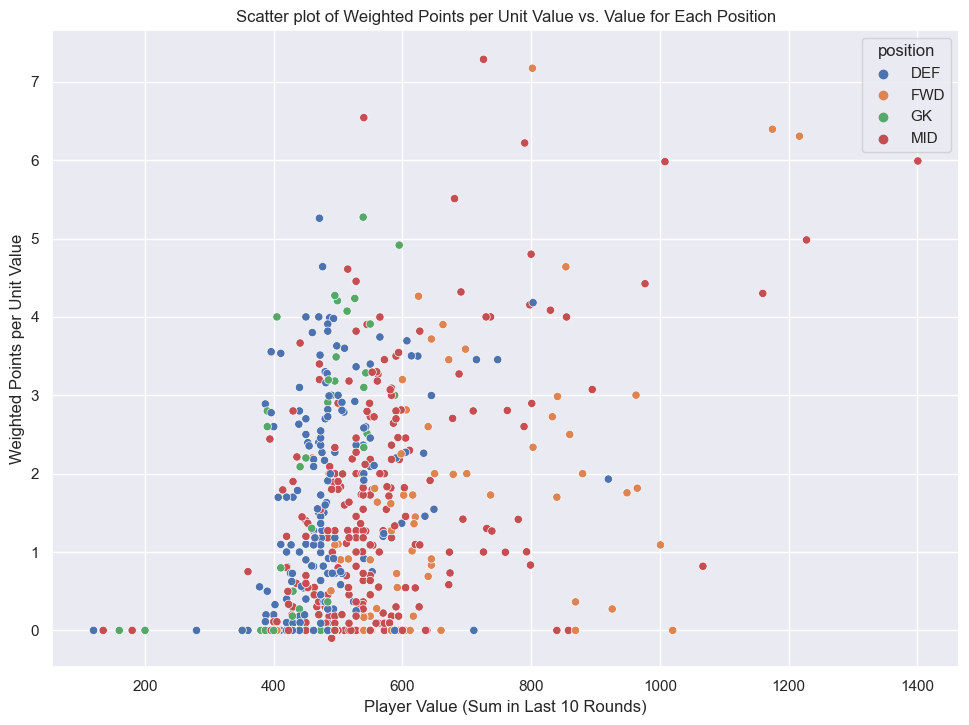

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Unit Value vs. Value for Each Position')
plt.xlabel('Player Value (Sum in Last 10 Rounds)')
plt.ylabel('Weighted Points per Unit Value')

# Show the plot
plt.show()


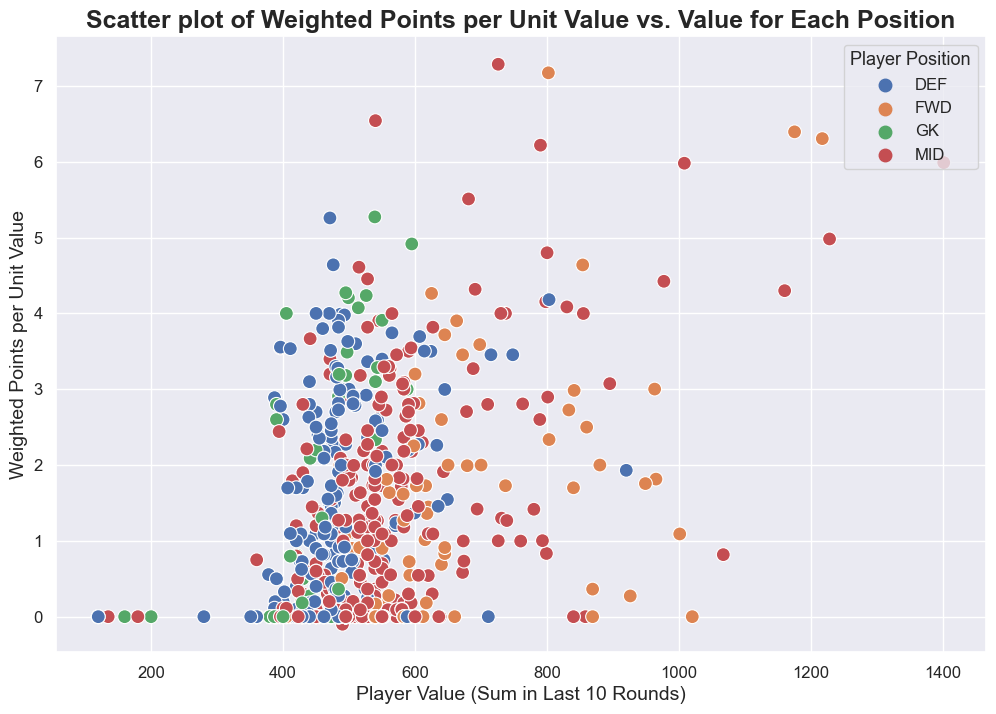

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position, s=100)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Unit Value vs. Value for Each Position', fontsize=18, fontweight='bold')
plt.xlabel('Player Value (Sum in Last 10 Rounds)', fontsize=14)
plt.ylabel('Weighted Points per Unit Value', fontsize=14)

# Customize the legend
legend = plt.legend(title="Player Position", title_fontsize='13', loc='upper right', fontsize='12', markerscale=1.5)

# Add gridlines
plt.grid(True)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [86]:
# Divide the total value of the players by 10
weighted_points_by_position['value'] = weighted_points_by_position['value'] / 110

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position, s=100)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Unit Value vs. Value for Each Position', fontsize=18, fontweight='bold')
plt.xlabel('Player Average Value (in Last 10 Rounds)', fontsize=14)
plt.ylabel('Weighted Points per Unit Value', fontsize=14)

# Customize the legend
legend = plt.legend(title="Player Position", title_fontsize='13', loc='upper right', fontsize='12', markerscale=1.5)

# Add gridlines
plt.grid(True)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


KeyError: 'value'

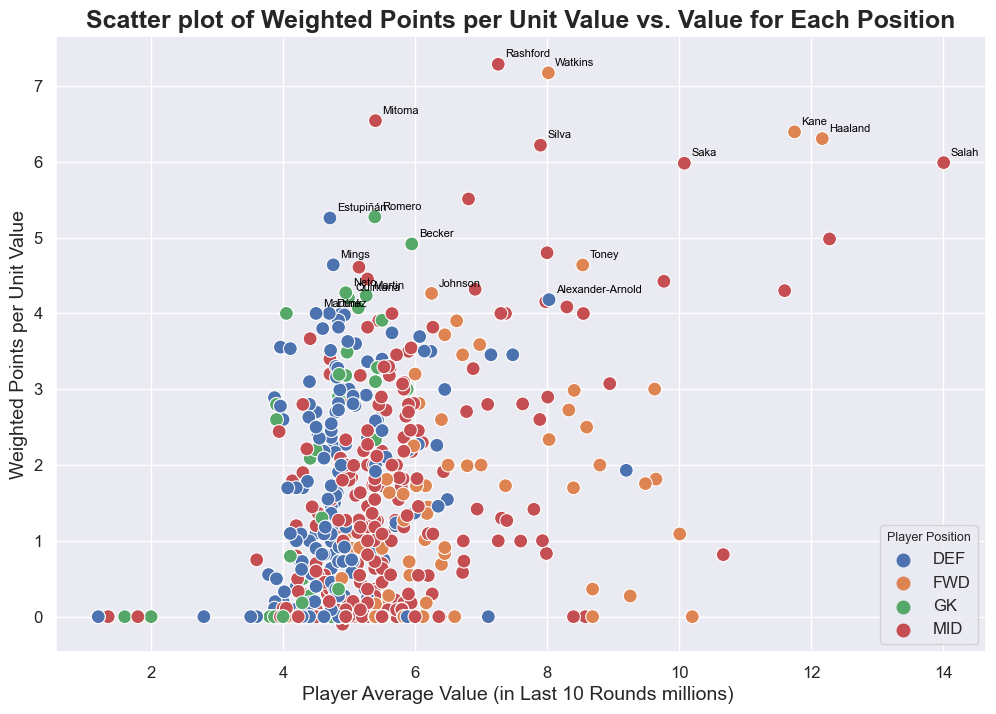

In [75]:
# Merge the top_performers_by_position with the weighted_points_by_position DataFrame
top_performers_by_position['surname'] = top_performers_by_position['name'].apply(lambda x: x.split()[-1])
#Get only the surname of the player
top_performers_merged = top_performers_by_position.merge(weighted_points_by_position, on=['name', 'position'])
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position, s=100)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Unit Value vs. Value for Each Position', fontsize=18, fontweight='bold')
plt.xlabel('Player Average Value (in Last 10 Rounds millions) ', fontsize=14)
plt.ylabel('Weighted Points per Unit Value', fontsize=14)

# Customize the legend
legend = plt.legend(title="Player Position", title_fontsize='9', loc='lower right', fontsize='12', markerscale=1.5)

# Add gridlines
plt.grid(True)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add player names as annotations for the top performers
for index, row in top_performers_merged.iterrows():
    scatter_plot.annotate(row['surname'], xy=(row['value_y'], row['weighted_points_per_value_x']), xytext=(5, 5), textcoords='offset points', fontsize=8, color='black')

# Show the plot
plt.show()


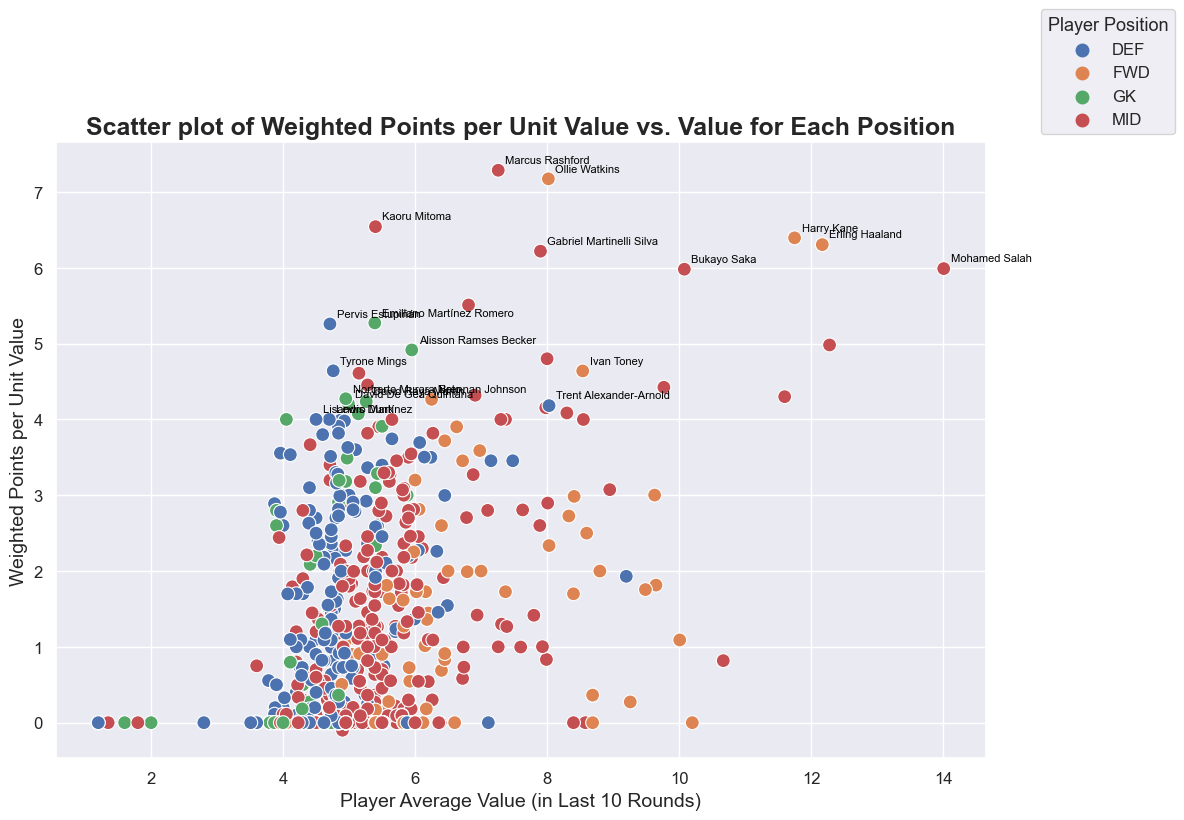

In [76]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position, s=100)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Unit Value vs. Value for Each Position', fontsize=18, fontweight='bold')
plt.xlabel('Player Average Value (in Last 10 Rounds)', fontsize=14)
plt.ylabel('Weighted Points per Unit Value', fontsize=14)

# Customize the legend
legend = plt.legend(title="Player Position", title_fontsize='13', loc='lower left', fontsize='12', markerscale=1.5, bbox_to_anchor=(1.05, 1))

# Add gridlines
plt.grid(True)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add player names as annotations for the top performers
for index, row in top_performers_merged.iterrows():
    scatter_plot.annotate(row['name'], xy=(row['value_y'], row['weighted_points_per_value_x']), xytext=(5, 5), textcoords='offset points', fontsize=8, color='black')

# Show the plot
plt.show()


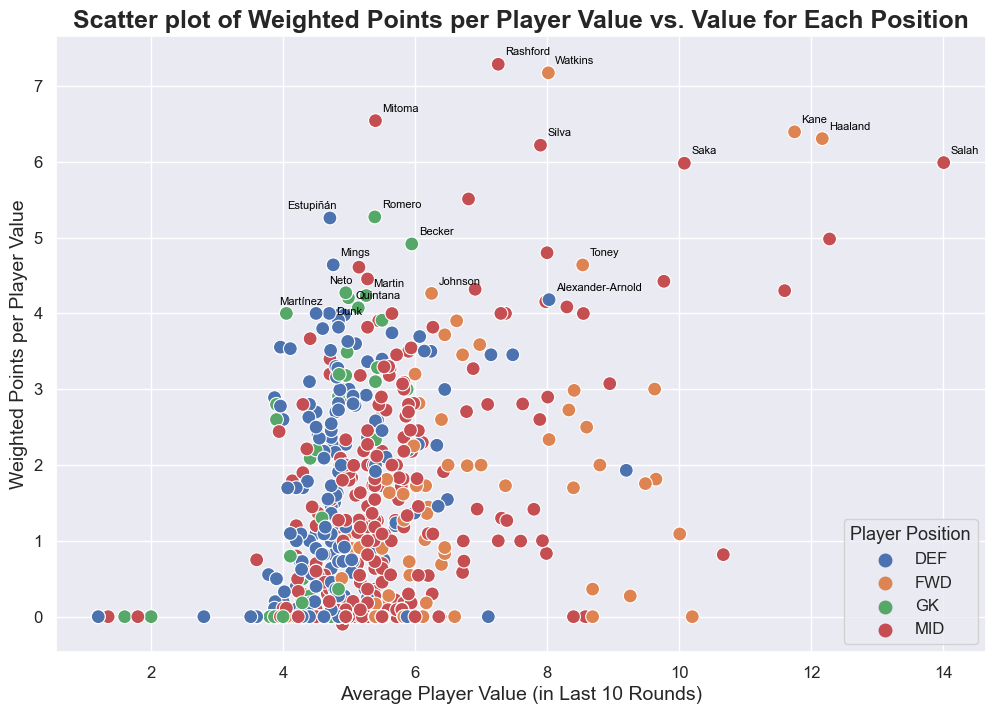

In [77]:
import adjustText

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position, s=100)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Player Value vs. Value for Each Position', fontsize=18, fontweight='bold')
plt.xlabel('Average Player Value (in Last 10 Rounds)', fontsize=14)
plt.ylabel('Weighted Points per Player Value', fontsize=14)

# Customize the legend
legend = plt.legend(title="Player Position", title_fontsize='13', loc='lower right', fontsize='12', markerscale=1.5)

# Add gridlines
plt.grid(True)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Initialize the list of text objects for the annotations
annotations = []

# Add player names as annotations for the top performers
for index, row in top_performers_merged.iterrows():
    annotation = scatter_plot.annotate(row['surname'], xy=(row['value_y'], row['weighted_points_per_value_x']), xytext=(5, 5), textcoords='offset points', fontsize=8, color='black')
    annotations.append(annotation)

# Adjust the text labels to minimize overlaps
adjustText.adjust_text(annotations, 
                       force_points=0.5, 
                       force_text=0.2, 
                       expand_points=(1.2, 1.2), 
                       expand_text=(1, 1), 
                       #arrowprops=dict(arrowstyle="-", color='grey', lw=0.5)
)

# Show the plot
plt.show()


In [78]:
#question from reddit

weighted_points_by_position.groupby('position').apply(lambda x: x.nlargest(, 'weighted_points_per_value')).reset_index(drop=True)

SyntaxError: invalid syntax (1453188756.py, line 3)

In [ ]:
average_player_value = weighted_points_by_position["value"].mean()
print("Average player value:", average_player_value)


Average player value: 1.2927290836653387


In [ ]:
weighted_points_by_position.dropna().groupby('position')

In [79]:
# Remove rows with missing (null) values
cleaned_data = weighted_points_by_position.dropna()

# Group the DataFrame by player name and calculate the mean value and mean weighted_points_per_value
average_player_data = cleaned_data.groupby(['name']).agg({'value': 'mean', 'weighted_points_per_value': 'mean'}).reset_index()

# Rename the columns for clarity
average_player_data.columns = ['name', 'average_value', 'average_weighted_points_per_value']
average_player_data

,name,average_value,average_weighted_points_per_value
0,Aaron Cresswell,4.73,0.993658
1,Aaron Hickey,5.39,2.363636
2,Aaron Ramsdale,5.88,3.000000
3,Aaron Wan-Bissaka,4.30,1.700000
4,Abdoulaye Doucouré,5.83,3.090909
...,...,...,...
748,Youri Tielemans,6.74,0.732938
749,Yves Bissouma,4.70,0.200000
750,Zack Steffen,4.00,0.000000
751,Zidane Iqbal,4.23,0.000000


In [81]:
# Calculate the overall average for value and weighted_points_per_value
overall_average_value = cleaned_data['value'].mean()
overall_average_weighted_points_per_value = cleaned_data['weighted_points_per_value'].mean()

print("Overall average value:", overall_average_value)
print("Overall average weighted points per value:", overall_average_weighted_points_per_value)


Overall average value: 5.170916334661355
Overall average weighted points per value: 1.1138501746187188


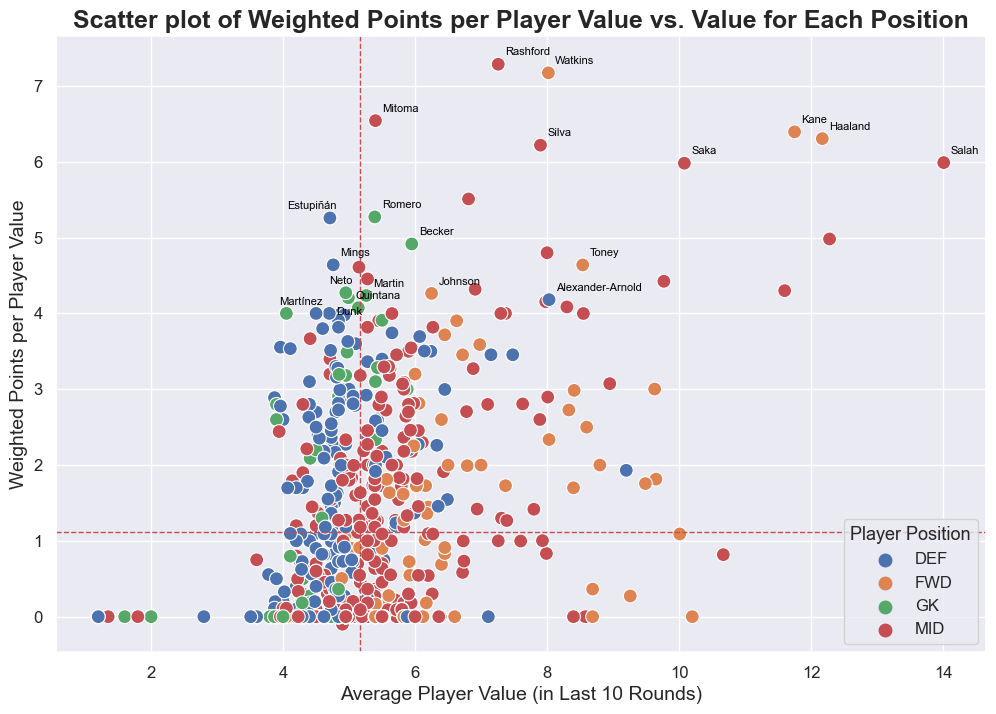

In [82]:
import adjustText

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter_plot = sns.scatterplot(x="value", y="weighted_points_per_value", hue="position", data=weighted_points_by_position, s=100)

# Set plot title and axis labels
plt.title('Scatter plot of Weighted Points per Player Value vs. Value for Each Position', fontsize=18, fontweight='bold')
plt.xlabel('Average Player Value (in Last 10 Rounds)', fontsize=14)
plt.ylabel('Weighted Points per Player Value', fontsize=14)

# Add vertical and horizontal lines at specified coordinates
plt.axvline(x=5.170916, color='r', linestyle='--', linewidth=1)
plt.axhline(y=1.113, color='r', linestyle='--', linewidth=1)



# Customize the legend
legend = plt.legend(title="Player Position", title_fontsize='13', loc='lower right', fontsize='12', markerscale=1.5)

# Add gridlines
plt.grid(True)

# Set the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Initialize the list of text objects for the annotations
annotations = []

# Add player names as annotations for the top performers
for index, row in top_performers_merged.iterrows():
    annotation = scatter_plot.annotate(row['surname'], xy=(row['value_y'], row['weighted_points_per_value_x']), xytext=(5, 5), textcoords='offset points', fontsize=8, color='black')
    annotations.append(annotation)

# Adjust the text labels to minimize overlaps
adjustText.adjust_text(annotations, 
                       force_points=0.5, 
                       force_text=0.2, 
                       expand_points=(1.2, 1.2), 
                       expand_text=(1, 1), 
                       #arrowprops=dict(arrowstyle="-", color='grey', lw=0.5)
)

# Show the plot
plt.show()


In [83]:
max_round = trendviolin['round'].max()

# Filter the dataset to include only the last 10 rounds
last_10_rounds = trendviolin.query(f"{max_round - 9} <= round <= {max_round}")

# Calculate the weighted mean of total_points for each player using their value as the weight
last_10_rounds = last_10_rounds.assign(weighted_points=last_10_rounds['value'] * last_10_rounds['total_points'])

# Group the filtered data by player name, position, and round, and sum the weighted mean values
weighted_points_by_position = last_10_rounds.groupby(['name', 'position']).agg({'weighted_points': 'sum'}).reset_index()

# Group the resulting DataFrame by position and select the top 5 players for each position
top_performers_by_position = weighted_points_by_position.groupby('position').apply(lambda x: x.nlargest(5, 'weighted_points')).reset_index(drop=True)
top_performers_by_position

,name,position,weighted_points
0,Trent Alexander-Arnold,DEF,3358
1,Andrew Robertson,DEF,2584
2,Pervis Estupiñán,DEF,2477
3,Virgil van Dijk,DEF,2470
4,Kieran Trippier,DEF,2243
5,Erling Haaland,FWD,7674
6,Harry Kane,FWD,7514
7,Ollie Watkins,FWD,5753
8,Ivan Toney,FWD,3962
9,Darwin Núñez Ribeiro,FWD,2891


In [85]:
last_10_rounds.query("name == 'Trent Alexander-Arnold'")

,position,was_home,round,kickoffdate,minutes,name,total_points,value,team,was_home_ind,playtime,weighted_points
13016,DEF,True,21,2023-01-21,18,Trent Alexander-Arnold,1,73,Liverpool,1,1,73
13762,DEF,False,22,2023-02-04,90,Trent Alexander-Arnold,1,73,Liverpool,0,1,73
14575,DEF,True,23,2023-02-13,90,Trent Alexander-Arnold,6,73,Liverpool,1,1,438
15363,DEF,False,24,2023-02-18,90,Trent Alexander-Arnold,12,73,Liverpool,0,1,876
16093,DEF,False,25,2023-02-25,70,Trent Alexander-Arnold,6,73,Liverpool,0,1,438
16094,DEF,True,25,2023-03-01,89,Trent Alexander-Arnold,7,73,Liverpool,1,1,511
16858,DEF,True,26,2023-03-05,90,Trent Alexander-Arnold,6,73,Liverpool,1,1,438
17665,DEF,False,27,2023-03-11,64,Trent Alexander-Arnold,2,73,Liverpool,0,1,146
19198,DEF,False,29,2023-04-01,90,Trent Alexander-Arnold,0,73,Liverpool,0,1,0
19199,DEF,False,29,2023-04-04,0,Trent Alexander-Arnold,0,73,Liverpool,0,0,0
